# Read the processed titanic dataframe.

Store it in a dataframe called `titanic_train` and `titanic_test`.

In [29]:
# your code here
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve

In [30]:
titanic_train=pd.read_csv("../data/titanic_train.csv")
titanic_test=pd.read_csv("../data/titanic_test.csv")

# Train and Test

You have separated the original dataset into train and test. In fact, what you were effectively doing was hiding some part of your data to analyse your scores afterwards.

# First Step: start simple

You will select two variables to create the predictive variables for your problem - store the features representing the `Sex` and `Age` in dataframes called `X_train` and `X_test`. (maybe the `sex` variable is written as `Sex_male` for example, if you dummyfied it)

Also store the variable `Survived` into pandas series called `y_train` and `y_test`. This is your target variable. 

In [31]:
# your code here
X_train=titanic_train[["Sex_male", "Age"]]
X_test=titanic_test[["Sex_male", "Age"]]
y_train=titanic_train["Survived"]
y_test=titanic_test["Survived"]

# Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Use the LogisticRegression classifier to train your model on your train set.

In [32]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Use your logistic regression model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

In [61]:
# your code here
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

## Evaluating the results

Use your model's method called `score` to evaluate the results on your test set. 

In [35]:
# your code here
score=model.score(X_test, y_test)
score

0.7471910112359551

## To think:

- What does the `.score()` method calculates?
- Is this metric appropriate for this use case? Why?

In [36]:
# your answer here

## Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` or the_ `sklearn.metrics.confusion_matrix` _method_ 

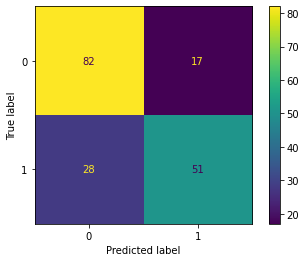

In [37]:
# your code here
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

## Precision-recall scores

## Calculate the precision and recall scores for the test set. 

_hint: Use the methods from sklearn.metrics_ 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [38]:
# your code here
from sklearn.metrics import recall_score, precision_score

precision=precision_score(y_test, model.predict(X_test))
recall=recall_score(y_test, model.predict(X_test))

print(precision)
print(recall)

0.75
0.6455696202531646


### Questions:

- What do these precision and recall scores mean? Explain precision and recall with your own words.
- Are these the precision and recall scores for which threshold? Explain what a threshold mean with your own words.

In [39]:
# your code here

## Compare a measure of accuracy, recall and precision for both train and test sets. 

You've calculated the metrics for the test dataset. Now, calculate the metrics for the train dataset and compare the results. What do you observe? Based on what you see, do you think your model has overfitted? 

In [52]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

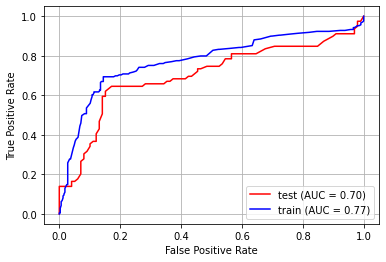

In [60]:
fig, ax=plt.subplots()
plot_roc_curve(model, X_test, y_test, color='red', ax=ax, name='test')
plot_roc_curve(model, X_train, y_train, color='blue', ax=ax, name='train')
plt.grid()

# Non-linear Models - Trees

## Create a decision tree model using the default arguments.

In [80]:
X_train1=titanic_train[["Sex_male", "Age"]]
X_test1=titanic_test[["Sex_male", "Age"]]

In [81]:
# your code here
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train1, y_train)

DecisionTreeClassifier()

## Calculate the accuracy, precision and recall scores for both the `training set` and the `test set`.

After calculating it, compare the results. What do you observe? Do you understand what does that mean?

In [84]:
print(tree.score(X_train1, y_train))
print(precision_score(y_train, tree.predict(X_train1)))
print(recall_score(y_train, tree.predict(X_train1)))

0.846441947565543
0.8469945355191257
0.7416267942583732


In [86]:
print(tree.score(X_test1, y_test))
print(precision_score(y_test, tree.predict(X_test1)))
print(recall_score(y_test, tree.predict(X_test1)))

0.6966292134831461
0.6984126984126984
0.5569620253164557


## Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

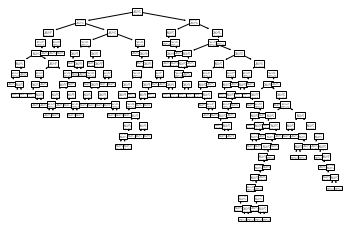

In [89]:
from sklearn.tree import plot_tree
plot_tree(tree);

What do you think happened? Did you expect the resulting tree to have that size?

## Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

Use `!pip install mlxtend --user` to install the `mlxtend` package


_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

where x_test is your dataframe.

In [41]:
# your code here

You should have observed a high granularity of lines cutting the drawing. What do you think those represent? What exactly do they represent from a Tree algorithm? 

In [42]:
# your answer here

## Perform the same operation (i.e., use the `mlxtend.plotting` module to plot the decision boundary) for the Logistic Regression model you've created above.

In [43]:
# your code here

What differences do you observe from them? The variable Age is important for the logistic regression? For different values of Age, how is the decision boundary affected? Why do you think that happens? Try to remember the `titanic-exploration` lab to recall how was Age correlated with the variable `Survived` and how we've managed to see some importance there.

In [44]:
# your code here

# Fixing the Decision Tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. This happens because, by default, the Decision Tree is so complex that it manages to memorize the whole dataset despite the granularity necessary to do that. It just keeps creating splits until each observation is memorized. 

In this sense, by default, the Decision Tree algorithm is **too complex**. We will solve this problem by making the tree a bit less complex. We'll change the parameter called `max_depth` for the DecisionTreeClassifier().

Try to find a good value for `max_depth` that helps getting closer results within `train` and `test` scores.

In [45]:
# your code here

## Plot the resulting tree and deicision boundary. 

After choosing a good value for `max_depth`, i.e., a value that manages to get a good balance within performance and generalization

In [46]:
# your code here

### Question:

- Can you identify which one was the most important feature on this decision tree model?

In [47]:
# your answer here

# Finally, use more variables

Try to obtain a good score for your problem. Use more variables if you wish. You can plot the tree to understand the variables.

In [48]:
# your code here